<a href="https://colab.research.google.com/github/kuweg/nn-experiments/blob/main/convolution_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [3]:
!curl -o flower.jpg https://lodev.org/cgtutor/images/photo3.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30423  100 30423    0     0  49228      0 --:--:-- --:--:-- --:--:-- 49228


In [4]:
flower = cv2.imread('flower.jpg')
g_flower = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
flower.shape

(240, 320, 3)

In [5]:
def add_padding(img: np.ndarray, padding: tuple) -> np.ndarray:
    res = np.pad(img.reshape(img.shape[0], img.shape[1], 1 if len(img.shape) == 2 else img.shape[2]),
                 pad_width = [padding, padding, (0,0)], mode = 'constant', constant_values = 0)
    return res

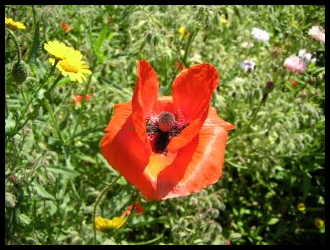

In [9]:
tt = add_padding(flower, (5,5))
cv2_imshow(tt)

In [16]:
def check_params_and_process_img(img, kernel, stride, padding):
    correct_params = (isinstance(stride[0], int)   and isinstance(stride[1], int) and
                        stride[0] >= 1 and stride[1] >= 1 and 
                        isinstance(padding, str))
    assert correct_params, "Parametrs should be integer, padding is str flag"

    if not isinstance(img, np.ndarray):
        img = np.array(img)
    
    if not isinstance(kernel, np.ndarray):
        kernel = np.array(kernel)
    

    if len(img.shape) > 2:
        if padding == 'same':
            img = add_padding(img, (1,1))
        res_img = np.zeros([(img.shape[0] - kernel.shape[0] + stride[0]) // stride[0], 
                            (img.shape[1] - kernel.shape[1] + stride[1]) // stride[1], img.shape[2]]).astype(np.float32)
    else:
        if padding == 'same':
            img = add_padding(img, (1,1))
        res_img = np.zeros([(img.shape[0] - kernel.shape[0] + stride[0]) // stride[0], 
                            (img.shape[1] - kernel.shape[1] + stride[1]) // stride[1]]).astype(np.float32)

    return res_img, kernel

In [19]:
def apply_kernel_2d(img, kernel, stride, padding: str = 'none'):
    res_img, kernel = check_params_and_process_img(img ,kernel, stride, padding)
    p_img = add_padding(img, (1,1))
    p_img = p_img.reshape(p_img.shape[0], p_img.shape[1])
    for x in range(res_img.shape[0]):
        for y in range(res_img.shape[1]):
            res_img[x, y] = np.sum(np.multiply(p_img[x * stride[0]:x * stride[0] + kernel.shape[0], y * stride[1]:y * stride[1] + kernel.shape[1]], kernel))
    return res_img

In [20]:
def conv(image, kernel, stride, padding: str = 'none'):
    if len(image.shape) > 2:
        return np.dstack([apply_kernel_2d(image[:, :, ch], kernel, stride, padding) for ch in range(image.shape[2])])
    else:
        return apply_kernel_2d(image, kernel, stride, padding)

In [32]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]]) 

factor = 1
bias = 128

In [26]:
%time
res = conv(flower, kernel, (1,1), 'same')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


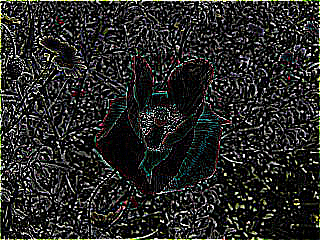

In [31]:
cv2_imshow(res)